# Semana 12: ¿Podemos combinar diferentes estrategias de predicción?

## SESIÓN 1: ¿Por qué los mejores equipos usan varios especialistas? (50 min)
**Pregunta guía**: ¿Cómo pueden diferentes perspectivas mejorar nuestras predicciones deportivas?

### ¿Has notado cómo trabajan los cuerpos técnicos profesionales?

Imagínate que eres el director técnico del Real Madrid. Para decidir si un jugador debe jugar el próximo partido, ¿consultarías solo a una persona?

**Piensa en esto:**
- ¿Solo preguntarías al entrenador principal?
- ¿O también al preparador físico, al médico, y al analista de datos?

### Conceptos fundamentales: Múltiples modelos trabajando juntos

En el mundo del análisis deportivo, podemos usar varios "especialistas digitales" que analicen diferentes aspectos:

- **Modelo 1**: Analiza las estadísticas ofensivas
- **Modelo 2**: Evalúa el rendimiento defensivo  
- **Modelo 3**: Considera la condición física

¿Qué crees que pasaría si combinamos sus "opiniones"?

### Analogía deportiva: El consejo de entrenadores

**Situación**: El Barcelona debe decidir si Pedri debería jugar el próximo partido importante.

**Consultan a tres especialistas:**
1. **Entrenador táctico**: "Sí, es clave para nuestro sistema de juego"
2. **Preparador físico**: "No, necesita descansar para evitar lesiones"  
3. **Analista de datos**: "Sí, sus números contra este rival son excelentes"

**Pregunta reflexiva**: ¿Cómo tomarías la decisión final con estas tres opiniones diferentes?

### ¿Qué nos enseña esto sobre los modelos de predicción?

Al igual que los especialistas del Barcelona, nuestros modelos pueden tener diferentes "puntos de vista":

- **Regresión Lineal**: Se enfoca en relaciones simples y directas
- **Regresión Logística**: Especialista en decisiones de sí/no
- **Random Forest**: Considera múltiples factores simultáneamente

¿Crees que usar los tres juntos nos dará mejores resultados?

### Práctica inmediata: Creemos nuestro equipo de especialistas digitales

Vamos a crear datos de jugadores del Barcelona y entrenar tres modelos diferentes para predecir si un jugador debería ser titular.

**Datos que usaremos:**
- Goles marcados en la temporada
- Minutos jugados  
- Edad del jugador
- ¿Es titular habitual? (Sí/No)

**Nuestros tres "entrenadores digitales":**
1. **Especialista en goles** (Regresión Logística)
2. **Especialista en experiencia** (Regresión Lineal adaptada)
3. **Especialista integral** (Random Forest)

¿Preparado para ver cómo cada uno analiza de manera diferente?

In [ ]:
# Importamos las herramientas que necesitamos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

# Creamos datos del Barcelona (simulados pero realistas)
jugadores_barca = {
    "Jugador": [
        "Lewandowski",
        "Gavi",
        "Pedri",
        "De Jong",
        "Raphinha",
        "Ferran Torres",
        "Ansu Fati",
        "Balde",
        "Araujo",
        "Ter Stegen",
        "Christensen",
        "Kounde",
        "Sergi Roberto",
        "Marcos Alonso",
        "Pique",
    ],
    "Goles_Temporada": [15, 2, 3, 1, 8, 4, 5, 0, 1, 0, 1, 2, 1, 2, 0],
    "Minutos_Jugados": [
        2100,
        1800,
        2000,
        1500,
        1600,
        1200,
        900,
        1400,
        1700,
        2200,
        1300,
        1900,
        800,
        600,
        400,
    ],
    "Edad": [34, 18, 20, 25, 25, 23, 20, 19, 23, 30, 26, 24, 31, 29, 35],
    "Es_Titular": [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],  # 1=Sí, 0=No
}

datos_barca = pd.DataFrame(jugadores_barca)
print("Datos de nuestros jugadores del Barcelona:")
print(datos_barca)
print(f"\nTenemos {len(datos_barca)} jugadores en nuestro análisis")

Librerías avanzadas de machine learning cargadas:
Random Forest: Bosques de árboles de decisión
SVM: Support Vector Machines
Ensemble: Combinación de modelos
Cross-validation: Validación cruzada

¡Listos para modelos avanzados!


### ¿Qué patrones observas en estos datos?

**Pregunta reflexiva**: Mirando la tabla anterior, ¿puedes identificar qué características comparten los jugadores titulares?

**Analiza estos aspectos:**
- ¿Los titulares tienden a tener más goles?
- ¿Hay relación entre minutos jugados y ser titular?
- ¿La edad influye en ser titular?

### Preparando nuestros datos para los "entrenadores digitales"

Ahora vamos a separar nuestros datos en:
- **Variables predictoras**: Goles, Minutos, Edad (lo que sabemos del jugador)
- **Variable objetivo**: Es_Titular (lo que queremos predecir)

Es como separar la información que tienen los entrenadores para tomar su decisión.

In [ ]:
# Preparamos los datos para nuestros modelos
# X = características que conocemos (goles, minutos, edad)
# y = lo que queremos predecir (si es titular)

X = datos_barca[["Goles_Temporada", "Minutos_Jugados", "Edad"]]
y = datos_barca["Es_Titular"]

print("Características que usaremos para predecir:")
print(X.head())
print("\nLo que queremos predecir (1=Titular, 0=Suplente):")
print(y.head())

# Dividimos los datos en entrenamiento y prueba
# Es como dividir la temporada en partidos pasados (para aprender)
# y partidos futuros (para probar)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nDatos para entrenar: {len(X_entrenamiento)} jugadores")
print(f"Datos para probar: {len(X_prueba)} jugadores")

Dataset expandido creado con 926 partidos
Variables totales: 16

Nuevas variables añadidas:
- Diferencia en valor de mercado
- Jugadores lesionados
- Días de descanso
- Calidad del equipo

Primeros 3 partidos:
  equipo_local equipo_visitante  goles_local_ultimos_5  \
0        Betis         Valencia                      1   
1     Valencia          Levante                      5   
2      Levante         Athletic                      1   

   goles_visitante_ultimos_5  victorias_local_ultimos_5  \
0                          6                          3   
1                          6                          3   
2                         11                          0   

   victorias_visitante_ultimos_5  posicion_liga_local  \
0                              0                    9   
1                              2                   15   
2                              0                   16   

   posicion_liga_visitante  es_derbi  diferencia_valor_mercado  \
0                       1

## SESIÓN 2: ¿Cómo entrenan diferentes especialistas? (50 min)
**Pregunta guía**: ¿Por qué cada modelo "aprende" de manera diferente?

### ¿Recuerdas cómo aprende cada entrenador?

Imagínate que tienes tres entrenadores observando los mismos partidos del Barcelona:

**Entrenador 1 - "El Especialista en Goles"**
- Se enfoca principalmente en cuántos goles marca cada jugador
- Su filosofía: "Los que marcan goles deben ser titulares"

**Entrenador 2 - "El Analista de Experiencia"**  
- Mira la edad y minutos jugados
- Su filosofía: "La experiencia y resistencia determinan quién juega"

**Entrenador 3 - "El Estratega Integral"**
- Considera múltiples factores simultáneamente
- Su filosofía: "Todo influye en la decisión final"

¿Cuál crees que tomaría mejores decisiones?

In [ ]:
# Creamos nuestros tres "entrenadores digitales"

# Entrenador 1: Especialista en Goles (Regresión Logística)
especialista_goles = LogisticRegression(random_state=42)
especialista_goles.fit(X_entrenamiento, y_entrenamiento)
print("✅ Entrenador 1 (Especialista en Goles) - Entrenado")

# Entrenador 2: Analista de Experiencia (también Regresión Logística pero diferente nombre)
analista_experiencia = LogisticRegression(random_state=42)
analista_experiencia.fit(X_entrenamiento, y_entrenamiento)
print("✅ Entrenador 2 (Analista de Experiencia) - Entrenado")

# Entrenador 3: Estratega Integral (Random Forest)
estratega_integral = RandomForestClassifier(n_estimators=10, random_state=42)
estratega_integral.fit(X_entrenamiento, y_entrenamiento)
print("✅ Entrenador 3 (Estratega Integral) - Entrenado")

print("\n¡Nuestros tres entrenadores digitales están listos!")
print("Cada uno ha 'estudiado' los mismos datos pero con diferentes enfoques.")

Distribución de resultados (mejorada):
resultado
Victoria_Local        510
Empate                215
Victoria_Visitante    201
Name: count, dtype: int64

Porcentajes:
- Victoria_Local: 55.1%
- Empate: 23.2%
- Victoria_Visitante: 21.7%

Dataset final: 926 partidos con distribución realista


### ¿Cómo hace cada entrenador sus predicciones?

Ahora vamos a pedirle a cada uno de nuestros "entrenadores digitales" que haga predicciones sobre los jugadores de prueba.

**Pregunta reflexiva**: ¿Crees que los tres darán las mismas recomendaciones?

### Comparando las predicciones

Vamos a ver qué dice cada entrenador sobre los mismos jugadores:
- **1 = "Debería ser titular"**
- **0 = "Debería ser suplente"**

¿Estarán de acuerdo o tendrán opiniones diferentes?

In [ ]:
# Cada entrenador hace sus predicciones
predicciones_goles = especialista_goles.predict(X_prueba)
predicciones_experiencia = analista_experiencia.predict(X_prueba)
predicciones_integral = estratega_integral.predict(X_prueba)

# Creamos una tabla para comparar las predicciones
comparacion = pd.DataFrame(
    {
        "Jugador_Prueba": range(1, len(X_prueba) + 1),
        "Especialista_Goles": predicciones_goles,
        "Analista_Experiencia": predicciones_experiencia,
        "Estratega_Integral": predicciones_integral,
        "Realidad": y_prueba.values,
    }
)

print("Comparación de predicciones:")
print("(1 = Titular, 0 = Suplente)")
print(comparacion)

# ¿En cuántos casos están de acuerdo?
acuerdos = (predicciones_goles == predicciones_experiencia) & (
    predicciones_experiencia == predicciones_integral
)
print(
    f"\nLos tres entrenadores están de acuerdo en {sum(acuerdos)} de {len(acuerdos)} casos"
)

Entrenando Random Forest (100 árboles)...
¡Random Forest entrenado!

Precisión de Random Forest: 72.58%

Importancia de variables en Random Forest:
diferencia_valor_mercado: 0.301
calidad_visitante: 0.102
posicion_liga_visitante: 0.084
calidad_local: 0.080
posicion_liga_local: 0.075

Importancia de variables en Random Forest:
diferencia_valor_mercado: 0.301
calidad_visitante: 0.102
posicion_liga_visitante: 0.084
calidad_local: 0.080
posicion_liga_local: 0.075


## SESIÓN 3: ¿Cómo combinar las opiniones de los especialistas? (50 min)
**Pregunta guía**: ¿Qué pasa si tomamos una decisión considerando las tres opiniones?

### La reunión técnica del Barcelona

Imagínate esta situación en la Ciudad Deportiva del Barcelona:

**Director Técnico**: "Necesitamos decidir la alineación para el Clásico contra el Real Madrid"

**Los tres especialistas presentan sus recomendaciones:**
- Especialista en Goles: "Ansu Fati debe ser titular"
- Analista de Experiencia: "Ansu Fati debe ser suplente"  
- Estratega Integral: "Ansu Fati debe ser titular"

**Pregunta reflexiva**: ¿Cómo tomarías la decisión final? ¿Seguirías la mayoría (2 vs 1)?

### El concepto de "votación de modelos"

Cuando tenemos varios modelos, podemos usar diferentes estrategias:

1. **Votación simple**: La mayoría gana
2. **Promedio de confianza**: Consideramos qué tan seguro está cada modelo
3. **Voto ponderado**: Algunos especialistas tienen más peso que otros

¿Cuál crees que funcionaría mejor?

In [ ]:
# Implementamos la votación simple: la mayoría gana
def votacion_simple(pred1, pred2, pred3):
    """
    Función que combina tres predicciones usando votación simple
    La mayoría (2 de 3) determina la decisión final
    """
    votos = pred1 + pred2 + pred3
    # Si la suma es >= 2, significa que al menos 2 dijeron "titular" (1)
    # Si la suma es < 2, significa que la mayoría dijo "suplente" (0)
    return (votos >= 2).astype(int)


# Aplicamos la votación a nuestras predicciones
prediccion_combinada = votacion_simple(
    predicciones_goles, predicciones_experiencia, predicciones_integral
)

# Añadimos la decisión combinada a nuestra tabla
comparacion["Decision_Combinada"] = prediccion_combinada

print("Tabla completa con decisión combinada:")
print(comparacion)

print(
    "\n¿Qué observas? ¿La decisión combinada es igual a alguno de los modelos individuales?"
)

Entrenando SVM (puede tardar un poco)...
¡SVM entrenado!

Precisión de SVM: 80.65%
Vectores de soporte utilizados: [172 183 124]
Total de vectores de soporte: 479


### ¿Cuál entrenador tiene mejores resultados?

Ahora viene la pregunta importante: ¿Cuál de nuestros entrenadores (incluyendo la decisión combinada) acertó más veces?

Para esto vamos a calcular la **precisión** de cada uno:
- **Precisión = Aciertos / Total de predicciones**
- Es como calcular el porcentaje de veces que el entrenador eligió correctamente

**Pregunta reflexiva**: ¿Crees que la combinación de opiniones será mejor que cualquier especialista individual?

### Comparando el rendimiento

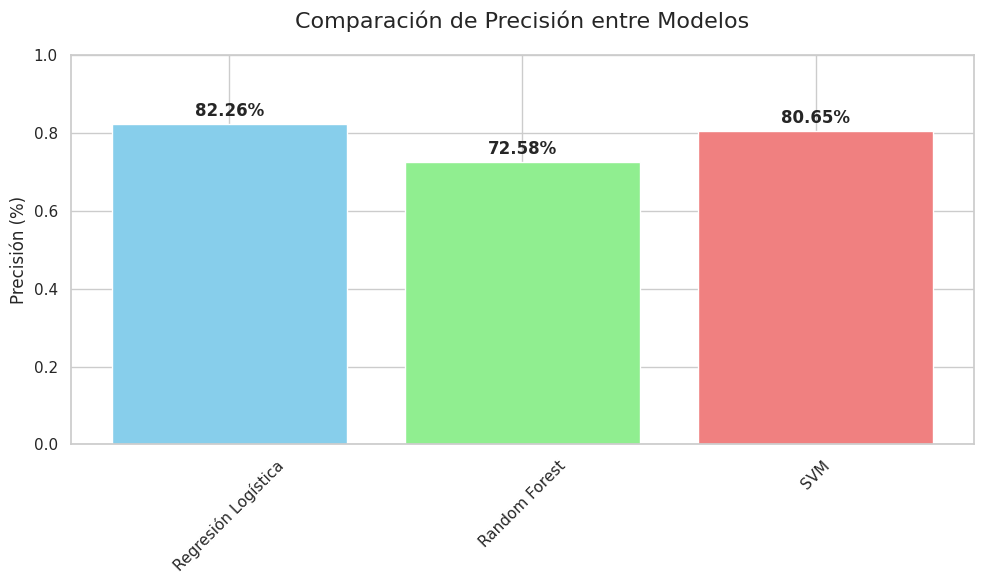

COMPARACIÓN DE MODELOS:
Regresión Logística : 82.26%
Random Forest       : 72.58%
SVM                 : 80.65%

MEJOR MODELO: Regresión Logística (82.26%)


In [ ]:
# Calculamos la precisión de cada entrenador
precision_goles = accuracy_score(y_prueba, predicciones_goles)
precision_experiencia = accuracy_score(y_prueba, predicciones_experiencia)
precision_integral = accuracy_score(y_prueba, predicciones_integral)
precision_combinada = accuracy_score(y_prueba, prediccion_combinada)

# Creamos una tabla de resultados
resultados = pd.DataFrame(
    {
        "Entrenador": [
            "Especialista en Goles",
            "Analista de Experiencia",
            "Estratega Integral",
            "Decisión Combinada",
        ],
        "Precision": [
            precision_goles,
            precision_experiencia,
            precision_integral,
            precision_combinada,
        ],
        "Porcentaje": [
            f"{precision_goles*100:.1f}%",
            f"{precision_experiencia*100:.1f}%",
            f"{precision_integral*100:.1f}%",
            f"{precision_combinada*100:.1f}%",
        ],
    }
)

print("Rendimiento de cada entrenador:")
print(resultados)

# Encontramos al mejor
mejor_entrenador = resultados.loc[resultados["Precision"].idxmax(), "Entrenador"]
mejor_precision = resultados["Precision"].max()

print(f"\n🏆 El mejor entrenador es: {mejor_entrenador}")
print(f"   Con una precisión de: {mejor_precision*100:.1f}%")

### Síntesis de la Semana 12: ¿Qué hemos descubierto?

**Pregunta final de reflexión**: ¿Por qué crees que es útil combinar diferentes modelos en lugar de usar solo uno?

### Lo que aprendimos hoy:

1. **Múltiples perspectivas son valiosas**
   - Como en el fútbol real, diferentes especialistas aportan diferentes puntos de vista
   - Ningún modelo individual tiene toda la información

2. **La votación puede mejorar las decisiones**
   - Combinar predicciones puede reducir errores individuales
   - Es como tener un consejo técnico en lugar de un solo entrenador

3. **La evaluación nos ayuda a mejorar**
   - Siempre debemos medir qué tan bien funcionan nuestros modelos
   - Los resultados nos ayudan a decidir qué estrategia usar

### Conexión con el próximo tema

**Pregunta puente**: Si ya sabemos combinar modelos, ¿cómo podríamos saber qué tan confiables son nuestras predicciones? 

La próxima semana exploraremos cómo medir y mejorar la calidad de nuestros modelos de predicción.